# **Predicting the survival of Passengers on the Titanic using Supervised Learning**

from:
**Group 14**

## Problem Statement

In this project we will predict if the passangers on the Titanic survived or not using three different classification algorithms.

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report

### Import training dataset

Here, we start off by importing the Titanic's training dataset provided: https://www.kaggle.com/competitions/titanic. We have downloaded the dataset and placed it in drive for easy access.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Just checking the shape and columns of the dataset before moving forward.

In [4]:
df_train.shape

(891, 12)

In [5]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Here, we import the Titanic's testing dataset.

In [6]:
df_test = pd.read_csv('/content/drive/MyDrive/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
df_test.shape

(418, 11)

In [8]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Now in order to move on with data preprocessing and exploration, it is essential that we combine the two dataset, as it would be easy to perform analysis on them. But, before doing that we can see that `df_test` does not have the target `Sruvived` column. So, in order to solve this, we will add a placeholder 'Survived' column to `df_test` and then combine the two.

In [9]:
# Add a placeholder 'Survived' column to test_df
df_test['Survived'] = np.nan

In [10]:
# Reorder columns to match train_df
df_test = df_test[df_train.columns]

In [11]:
# Combine the datasets
data = pd.concat([df_train, df_test], ignore_index=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Data Preprocessing and Exploration

#### Data Cleaning

We can start off by looking for more info on the dataset.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


Let's understand the dataset even more:

| Column Name    | Description                                                                                  |
|-----------------|----------------------------------------------------------------------------------------------|
| `PassengerId`  | A unique identifier for each passenger.                                                      |
| `Survived`     | Target variable indicating survival status (1 = survived, 0 = did not survive, NaN = test set). |
| `Pclass`       | Passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class).                               |
| `Name`         | Name of the passenger, including title and full name.                                        |
| `Sex`          | Gender of the passenger (`male` or `female`).                                                |
| `Age`          | Age of the passenger in years.                                |
| `SibSp`        | Number of siblings or spouses aboard the Titanic with the passenger.                         |
| `Parch`        | Number of parents or children aboard the Titanic with the passenger.                         |
| `Ticket`       | Ticket number assigned to the passenger.                                                     |
| `Fare`         | Fare paid for the ticket.                                     |
| `Cabin`        | Cabin number assigned to the passenger.                                |
| `Embarked`     | Port of embarkation (`C` = Cherbourg, `Q` = Queenstown, `S` = Southampton, NaN = missing).    |

We can look at the stats of the dataset.

In [13]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


We can start off data cleaning procedure (if any) by checking for missing values

In [14]:
data.isnull().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


We can see that `Survived` has 418, `Age` has 263, `Cabin` has 1014 and `Embarked` has 2 missing values.

We are not going to impute the `Survived` feature because we know we just added the placeholder of the size of df_test.

We can start imputing the values of `Age`. Here, we will impute the median value because median is less sensitive to outliers compared to the mean, making it a good choice for filling missing values in data like age.

In [15]:
# Impute 'Age' with median
data['Age'] = data['Age'].fillna(data['Age'].median())

# Check after imputing
data['Age'].isnull().sum()

0

Now for `Embarked`, we will impute it with mode values because it represents the most frequent category, preserving the feature's data distribution.

In [16]:
# Impute 'Embarked' with mode
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Check after imputing
data['Embarked'].isnull().sum()

0

For `Cabin`, we are just going to drop the feature due to high percentage of missing data

In [17]:
data.drop('Cabin', axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,S


For `Fare`, we are going to impute median values.

In [18]:
# Impute 'Fare' with median
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

# Check after imputing
data['Fare'].isnull().sum()

0

Let's check if the dataset has duplicated values

In [19]:
data.duplicated().sum()

0

We can see that we don't have any duplicated values

Now let's check for any data imbalance in the dataset.

Class distribution in the target variable:
 Survived
0.0    549
1.0    342
Name: count, dtype: int64


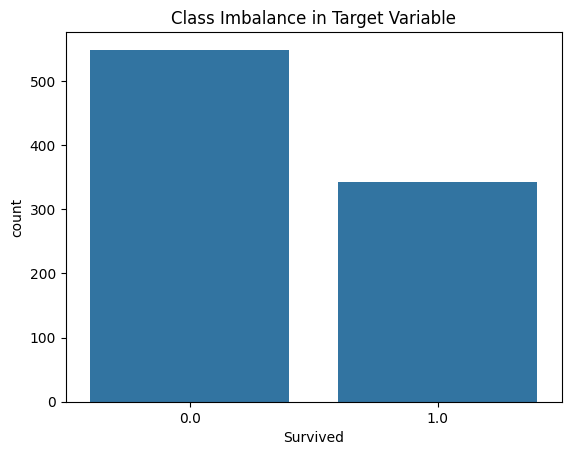

In [20]:
target_counts = data['Survived'].value_counts()
print("Class distribution in the target variable:\n", target_counts)

# Visualize class distribution
sns.countplot(x='Survived', data=data)
plt.title("Class Imbalance in Target Variable")
plt.show()

From the above graph we can see that majority class (0 - did not survive) outnumbers the minority (1 - survived.)

Now, let's check it for categorical features.


Imbalance in Pclass:
Pclass
3    709
1    323
2    277
Name: count, dtype: int64


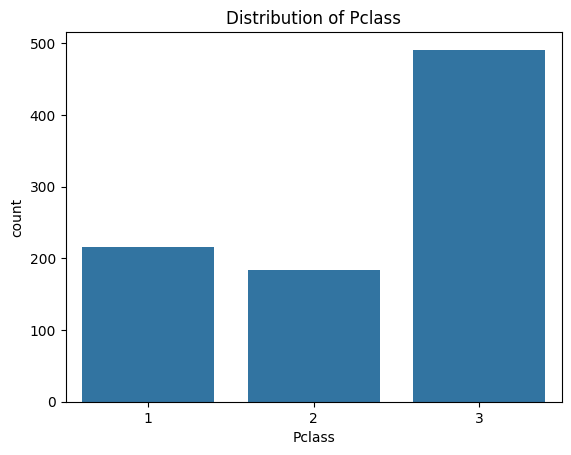


Imbalance in Sex:
Sex
male      843
female    466
Name: count, dtype: int64


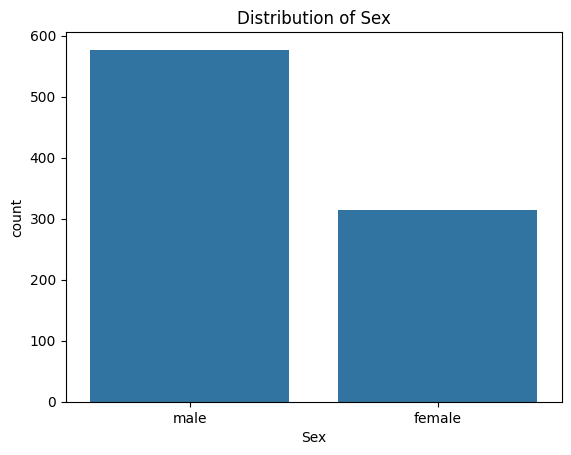


Imbalance in Embarked:
Embarked
S    916
C    270
Q    123
Name: count, dtype: int64


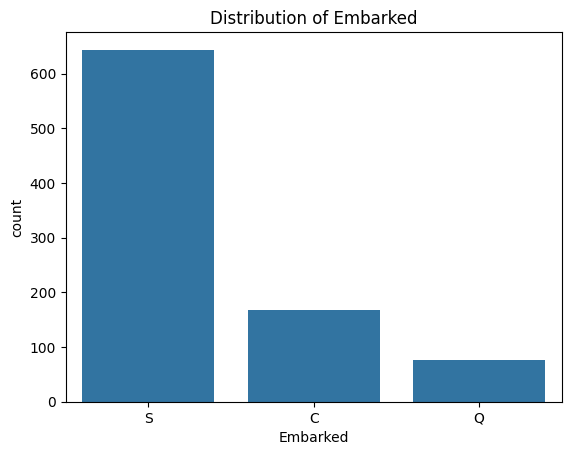


Imbalance in SibSp:
SibSp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64


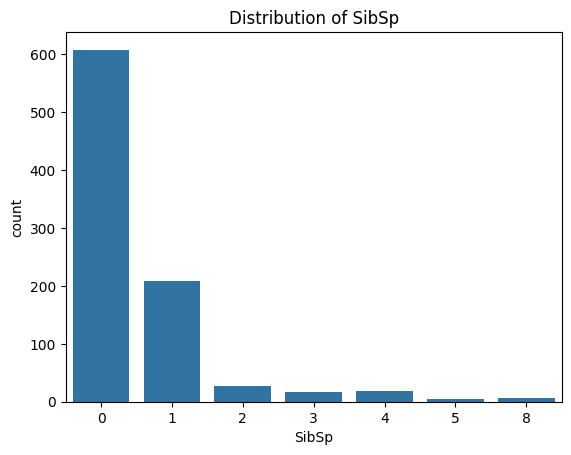


Imbalance in Parch:
Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64


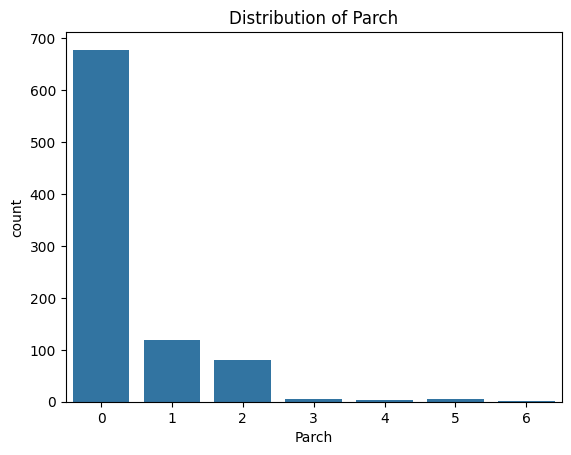

In [21]:
categorical_features = ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']
for feature in categorical_features:
    counts = data[feature].value_counts()
    print(f"\nImbalance in {feature}:")
    print(counts)

    # Visualize imbalance
    sns.countplot(x=feature, data=df_train)
    plt.title(f"Distribution of {feature}")
    plt.show()

### Explanatory Data Anaysis (EDA)

We can start EDA by visualizing `Age` distribution using histogram

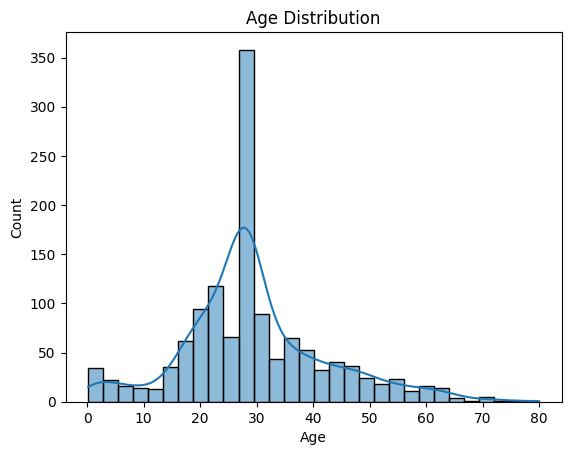

In [22]:
# Visualize Age distribution
sns.histplot(data['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

From histogram, we can see that mostly there were passangers of 30 years of age.

Let's compare `Survival` rates by categorial and numerical variables to understand their impact.

For that, let's create a function `plot_feature_vs_survived` to visualize the features vs survived.

In [23]:
def plot_feature_vs_survived(data, features, plot_type="count"):
    """
    Plot features against the target variable 'Survived'.

    Parameters:
    - data: DataFrame containing the features and 'Survived' column.
    - features: List of features to visualize.
    - plot_type: Type of plot ('count', 'box', 'violin', or 'kde').
    """
    for feature in features:
        plt.figure(figsize=(8, 4))
        if plot_type == "count" and data[feature].nunique() < 10:  # Categorical/low cardinality
            sns.countplot(x=feature, hue='Survived', data=data)
            plt.title(f"Survival by {feature}")
        elif plot_type == "box":
            sns.boxplot(x='Survived', y=feature, data=data)
            plt.title(f"Boxplot of {feature} by Survival")
        elif plot_type == "violin":
            sns.violinplot(x='Survived', y=feature, data=data)
            plt.title(f"Violin Plot of {feature} by Survival")
        elif plot_type == "kde" and data[feature].dtype != 'object':  # Numerical
            sns.kdeplot(data=data, x=feature, hue='Survived', common_norm=False, fill=True)
            plt.title(f"KDE Plot of {feature} by Survival")
        else:
            print(f"Feature {feature} not suitable for {plot_type} plot.")
        plt.tight_layout()
        plt.show()

numerical_features = ['Age', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']

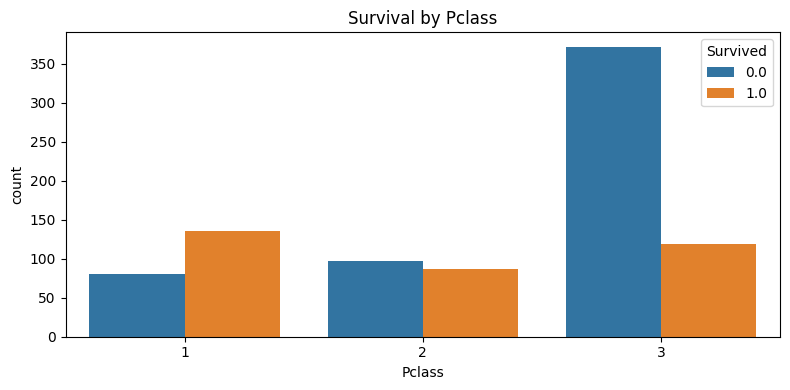

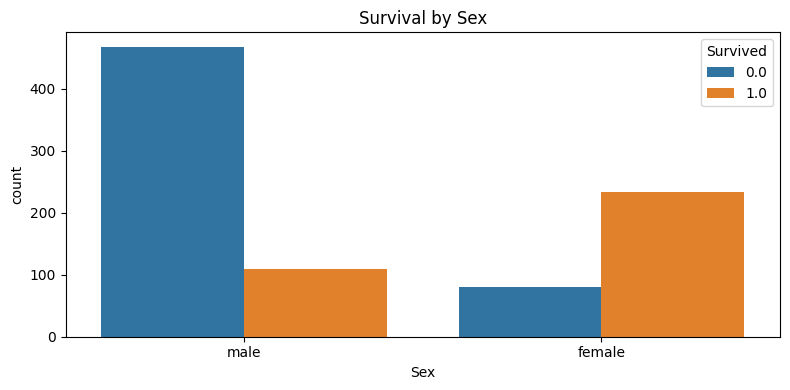

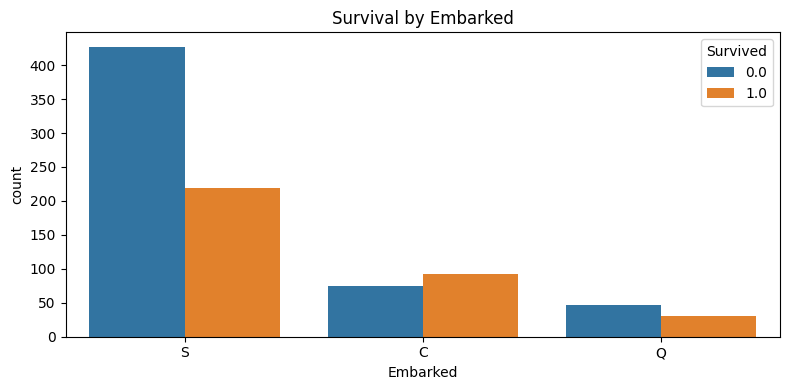

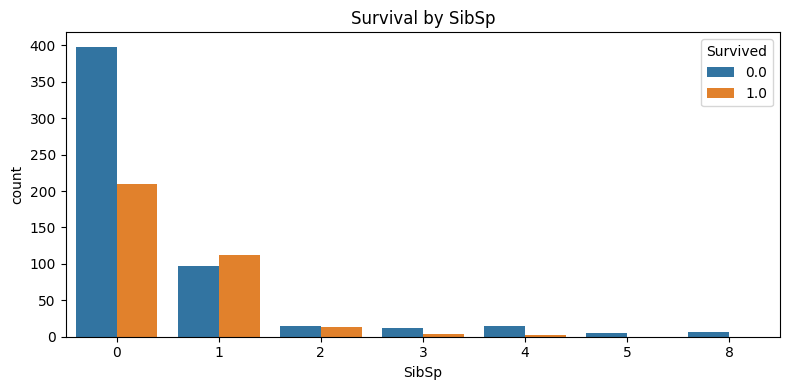

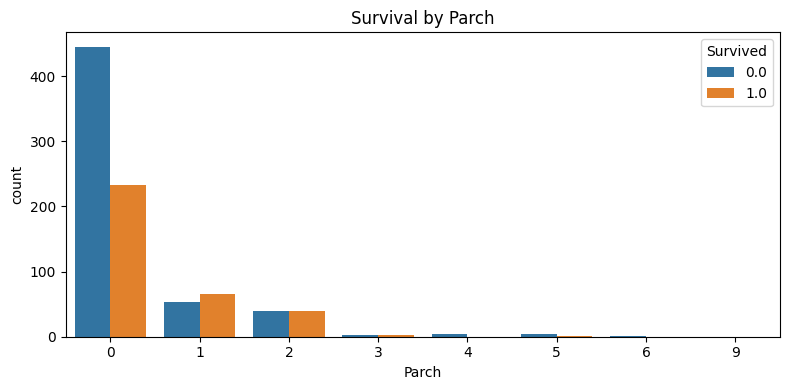

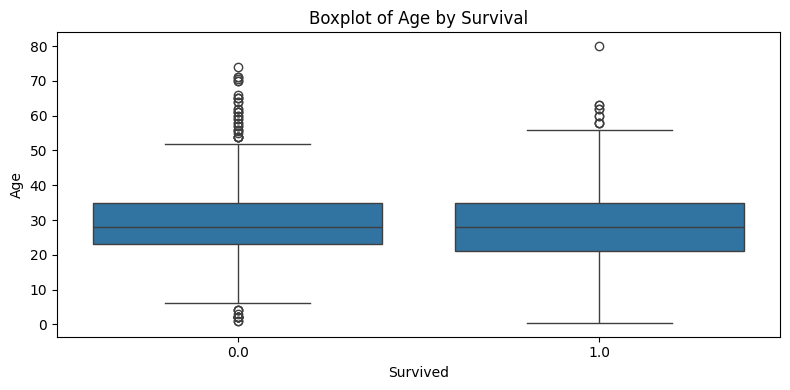

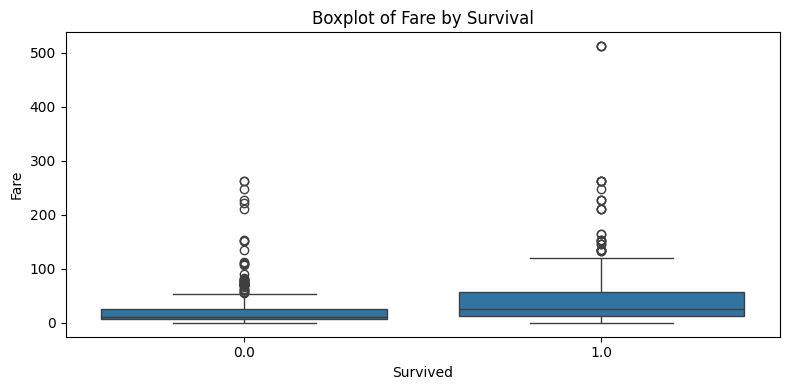

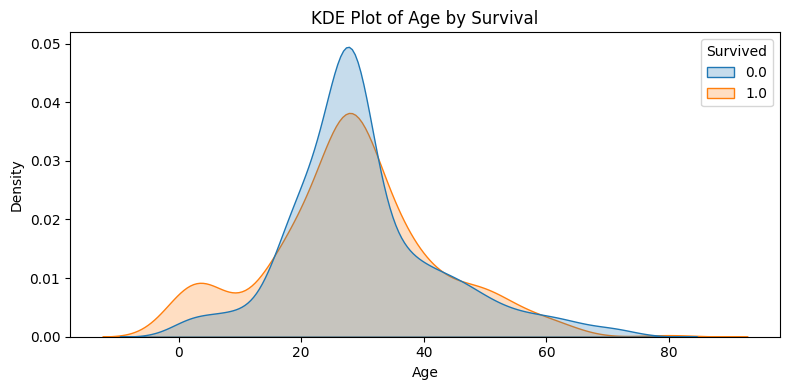

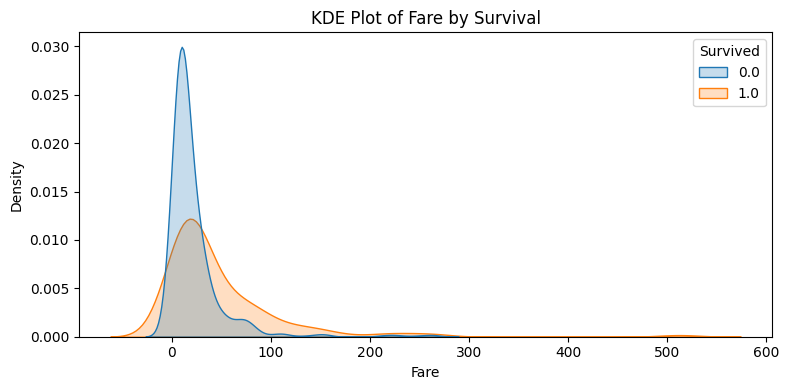

In [24]:
# Plot categorical features
plot_feature_vs_survived(data, categorical_features, plot_type="count")

# Plot numerical features
plot_feature_vs_survived(data, numerical_features, plot_type="box")
plot_feature_vs_survived(data, numerical_features, plot_type="kde")

Let's check the Pairplot of numerical features.

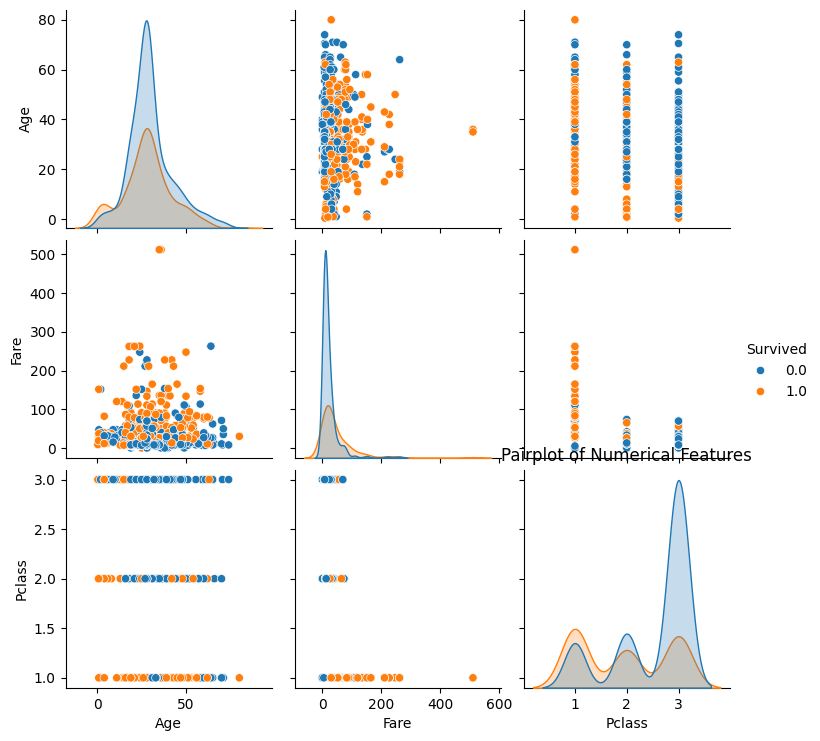

In [25]:
sns.pairplot(data, hue='Survived', vars=['Age', 'Fare', 'Pclass'])
plt.title("Pairplot of Numerical Features")
plt.show()

### Feature Engineering

Let's begin with dropping `Name` column as it is not necessary and won't contribute much.

In [26]:
data = data.drop('Name', axis=1)

Similarly, let's drop `Ticket`, `Cabin`, `PassengerId` as well as they won't help in prediction.

In [27]:
data = data.drop(['Ticket', 'Cabin', 'PassengerId'], axis=1)

We would also need to get encode the `Sex` column. We assign:

- male: 0
- female: 1

In [28]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Sex'].head()

,Sex
0,0
1,1
2,1
3,1
4,0


As, `Embarked` is also categorical variable with more than two levels, One-hot encoding is appropriate for this:

In [29]:
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0.0,3,0,22.0,1,0,7.2500,False,True
1,1.0,1,1,38.0,1,0,71.2833,False,False
2,1.0,3,1,26.0,0,0,7.9250,False,True
3,1.0,1,1,35.0,1,0,53.1000,False,True
4,0.0,3,0,35.0,0,0,8.0500,False,True


In [30]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0.0,3,0,22.0,1,0,7.2500,False,True
1,1.0,1,1,38.0,1,0,71.2833,False,False
2,1.0,3,1,26.0,0,0,7.9250,False,True
3,1.0,1,1,35.0,1,0,53.1000,False,True
4,0.0,3,0,35.0,0,0,8.0500,False,True


There is no need for dimensionality reduction for our usecase as the number of features is small, and engineered features are intuitive and likely to contribute valuable information.

Also, since we are done with the feature engineering step, we can plot the correlation matrix as well.

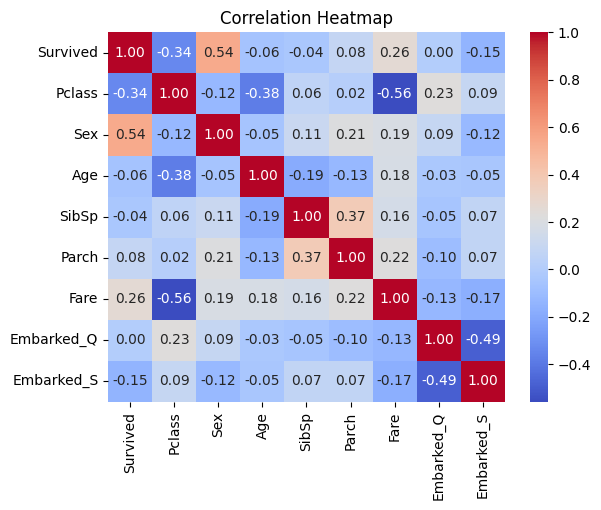

In [31]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

From the correlation matrix we can see that `Sex`, `Pclass`, and `Fare` are the most relevant features for survival prediction based on their correlation with `Survived`.

Features like `SibSp`, `Parch`, `Embarked_Q`, and `Embarked_S` have weak correlations with `Survived`, suggesting limited influence. However, their interaction with other features might still hold value.


## Model Selection and Implementation

Now, before moving further, the `Survived` column in the test dataset contains null values as placeholders, we will separate the datasets back into training and test sets. We will remove the `Survived` column entirely from the test dataset to ensure consistency.

In [32]:
# Filter rows with non-null 'Survived' values for the training dataset
df_train = data[data['Survived'].notnull()]

# Filter rows with null 'Survived' values for the test dataset and drop the 'Survived' column
df_test = data[data['Survived'].isnull()].drop('Survived', axis=1)

Let's perform the train-validation split from `df_train`. Before we test it on `df_test`.

In [33]:
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Let's train and evaluate models. Here, we are going to use:

- `Logistic Regression`
- `Decision Tree`
- `Random Forest`

In [35]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

Below code trains multiple models on the training se as specified, evaluates their performance on the validation set using various metrics (accuracy, F1-score, precision, recall, ROC-AUC), and visualizes their confusion matrices.

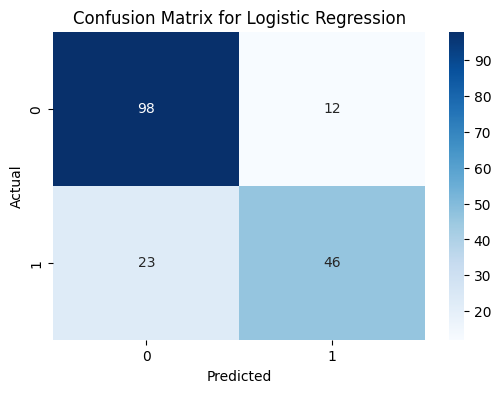

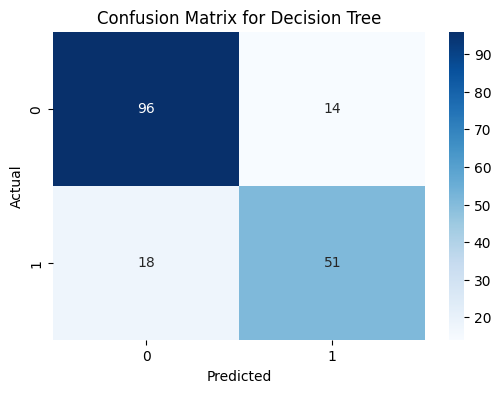

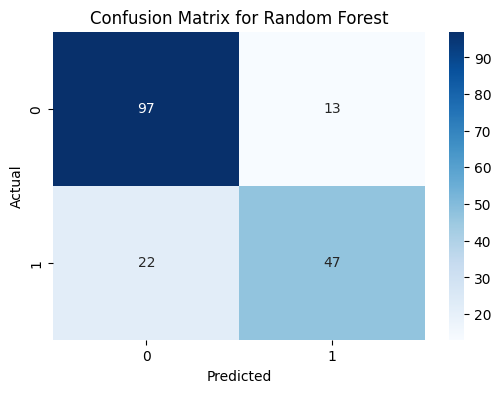

In [36]:
metrics = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred_proba) if y_pred_proba is not None else None

    metrics[model_name] = {
        "Accuracy": accuracy,
        "F1-Score": f1,
        "Precision": precision,
        "Recall": recall,
        "ROC-AUC": roc_auc
    }

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

After training, let's see how these model did. We can check it through metrics that we calculated earlier.

In [37]:
# Save the metrics as a dataframe for better readability
metrics_df = pd.DataFrame(metrics).T

# Display the metrics table
print("Model Performance Metrics:")
display(metrics_df)

Model Performance Metrics:


,Accuracy,F1-Score,Precision,Recall,ROC-AUC
Logistic Regression,0.804469,0.724409,0.793103,0.666667,0.844269
Decision Tree,0.821229,0.761194,0.784615,0.739130,0.805072
Random Forest,0.804469,0.728682,0.783333,0.681159,0.834783


From the metrics we can see that:

- `Logistic Regression`: Performed well in ranking predictions with the highest ROC-AUC (0.842) but struggled with identifying true positives, as indicated by the lowest Recall (0.667).

- `Decision Tree`: Achieved the highest Accuracy (0.821) and Recall (0.739), correctly identifying the most true positives, but slightly compromised precision, showing potential overfitting.

- `Random Forest`: Delivered balanced performance across all metrics, combining good precision (0.783) and recall (0.681). Slightly lower recall than Decision Tree, meaning it missed more survivors compared to the Decision Tree.



We can also take a look at classification report for each model

In [38]:
# Generate and display the classification report for each model
for model_name, model in models.items():
    y_pred = model.predict(X_val)
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_val, y_pred))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85       110
         1.0       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


Classification Report for Decision Tree:
              precision    recall  f1-score   support

         0.0       0.84      0.87      0.86       110
         1.0       0.78      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       110
         1.0       0.78      0.68      0.73        69

    accuracy                           0.80       

Now, let's test the models on the testing set (`df_test`) and evaluate their prediction.

In [39]:
test_predictions = {}

# Use a copy to preserve the original structure
df_test_features = df_test.copy()

for model_name, model in models.items():
    # Train the model on the full training set
    model.fit(X, y)

    # Predict on the test dataset
    y_test_pred = model.predict(df_test_features)
    y_test_pred_proba = model.predict_proba(df_test_features)[:, 1] if hasattr(model, "predict_proba") else None

    # Store predictions and probabilities
    test_predictions[f"{model_name}_Pred"] = y_test_pred
    if y_test_pred_proba is not None:
        test_predictions[f"{model_name}_Pred_Proba"] = y_test_pred_proba

# Convert predictions to a DataFrame
test_predictions_df = pd.DataFrame(test_predictions)

Let's check the results of test data.

The output shows the predictions and probabilities for each model (Logistic Regression, Decision Tree, Random Forest) on the test dataset. Each model's predictions (_Pred) indicate whether a passenger is predicted to survive (1) or not (0), while the probabilities (_Pred_Proba) represent the model's confidence in its prediction.

In [40]:
test_predictions_df

,Logistic Regression_Pred,Logistic Regression_Pred_Proba,Decision Tree_Pred,Decision Tree_Pred_Proba,Random Forest_Pred,Random Forest_Pred_Proba
0,0.0,0.108804,0.0,0.0,0.0,0.08
1,0.0,0.346389,0.0,0.0,0.0,0.24
2,0.0,0.110709,1.0,1.0,0.0,0.13
3,0.0,0.102480,1.0,1.0,1.0,0.73
4,1.0,0.563092,1.0,1.0,0.0,0.46
...,...,...,...,...,...,...
413,0.0,0.098896,0.0,0.0,0.0,0.00
414,1.0,0.938592,1.0,1.0,1.0,0.99
415,0.0,0.068314,0.0,0.0,0.0,0.01
416,0.0,0.098896,0.0,0.0,0.0,0.00


#### Insights from the Model Predictions and Probabilities

1. **Logistic Regression**:
   - Predicts with cautious confidence, with probabilities often closer to the middle (e.g., `0.108804`).
   - This shows it uses a smooth decision-making process, avoiding overly confident predictions.

2. **Decision Tree**:
   - Makes very confident predictions, with probabilities often close to `0` or `1`.
   - This happens because decision trees make strict, step-by-step decisions based on the data.

3. **Random Forest**:
   - Predictions are balanced, with probabilities that are more moderate (e.g., `0.46`).
   - This is because it combines decisions from many trees, making it more stable and less likely to overfit.